# NE 204 Lab 1 - Using Jaewon's Data

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy.integrate as integrate
from scipy.optimize import curve_fit
import scipy.signal
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import HoverTool
import time
import pandas as pd

# import tool repo
import sys

sys.path.append('/Users/kalie/courses/ne204/lab/kalieknecht_lab1')
from tools import find_activity, import_data, subtract_baseline
from filters import fit_tau, fit_taus, TrapezoidalFilter

# sys.path.append('/Users/kalie/courses/ne204/lab/lab_partners/ne204lib')
# from kit204lib.spectrum import Spectrum
# from kit204lib.filters import jordanov_filter, cooper_filter
# from kit204lib.analyze_waveform import plot_pulses, fit_tau
# from kit204lib.make_histogram import make_histogram
# from scipy.signal import find_peaks, peak_prominences

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
f_name = '../data/1012_co60.h5'
calibration, calibration_events = import_data(f_name)
calibration_bkg = subtract_baseline(calibration)

In [20]:
calibration_bkg.shape

(15862, 50000)

In [3]:
calibration_bkg.shape

(15862, 50000)

<IPython.core.display.Javascript object>


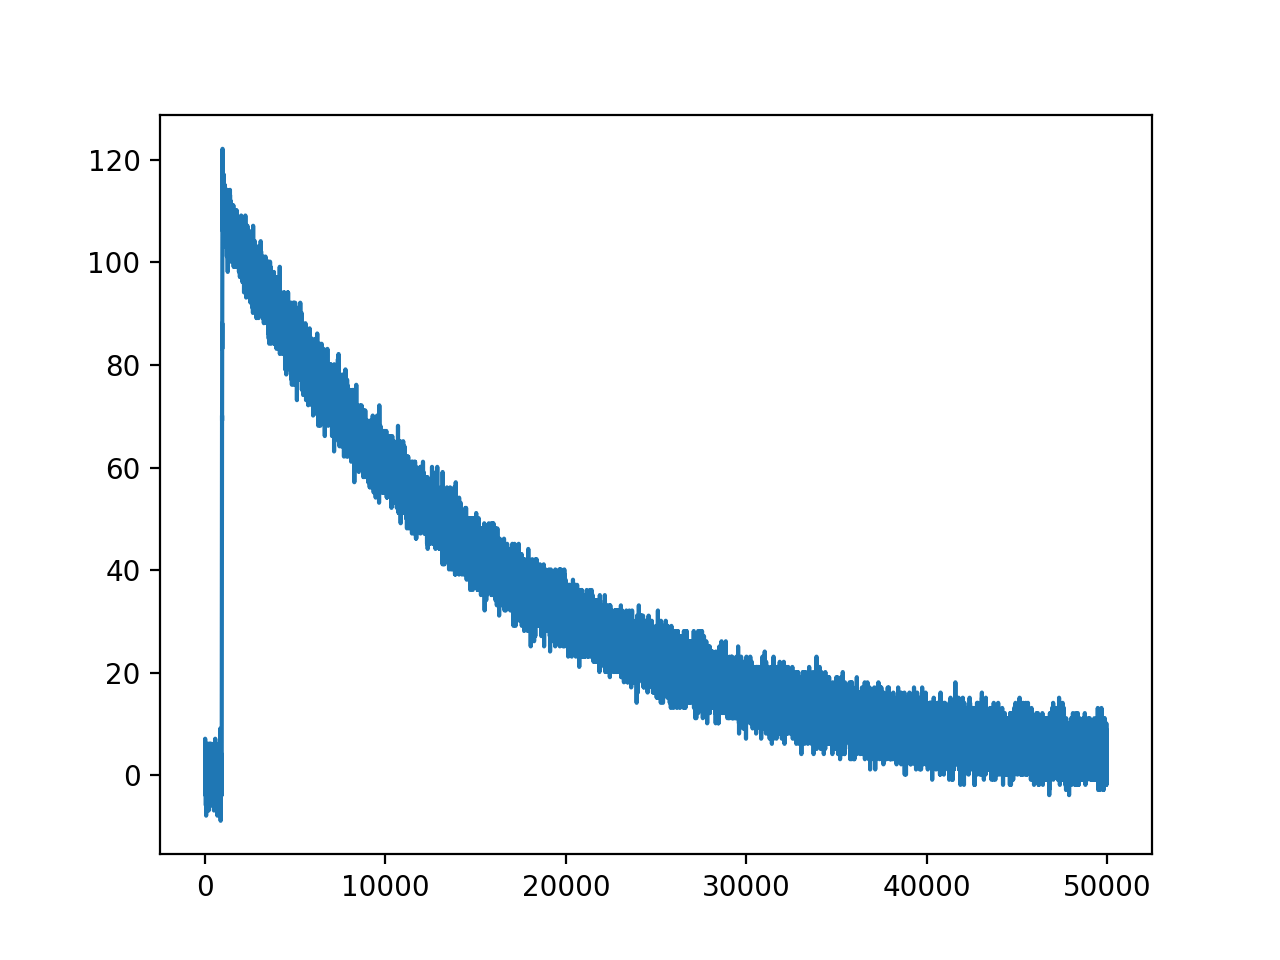

In [8]:
plt.figure()
plt.plot(calibration_bkg[0])
plt.show()

In [9]:
fit_taus?

In [15]:
taus = fit_taus(calibration_bkg,pre_sample_length=1000,fit_length=49000)

/Users/kalie/courses/ne204/lab/kalieknecht_lab1/filters.py:92: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-t / tau)
/Users/kalie/courses/ne204/lab/kalieknecht_lab1/filters.py:92: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-t / tau)


mean and variance: 3350741971.178008 1.711005344282257e+21


In [16]:
np.histogram(taus)

(array([15735,    22,    20,    13,    25,    17,     5,    11,     8,
            6]),
 array([1.66365559e+03, 9.09681670e+10, 1.81936332e+11, 2.72904498e+11,
        3.63872663e+11, 4.54840828e+11, 5.45808993e+11, 6.36777159e+11,
        7.27745324e+11, 8.18713489e+11, 9.09681655e+11]))

In [21]:
good_taus = taus[taus < 1e5]

In [22]:
good_taus.mean(), good_taus.std()

(15895.588035931503, 5522.878394921731)

<IPython.core.display.Javascript object>


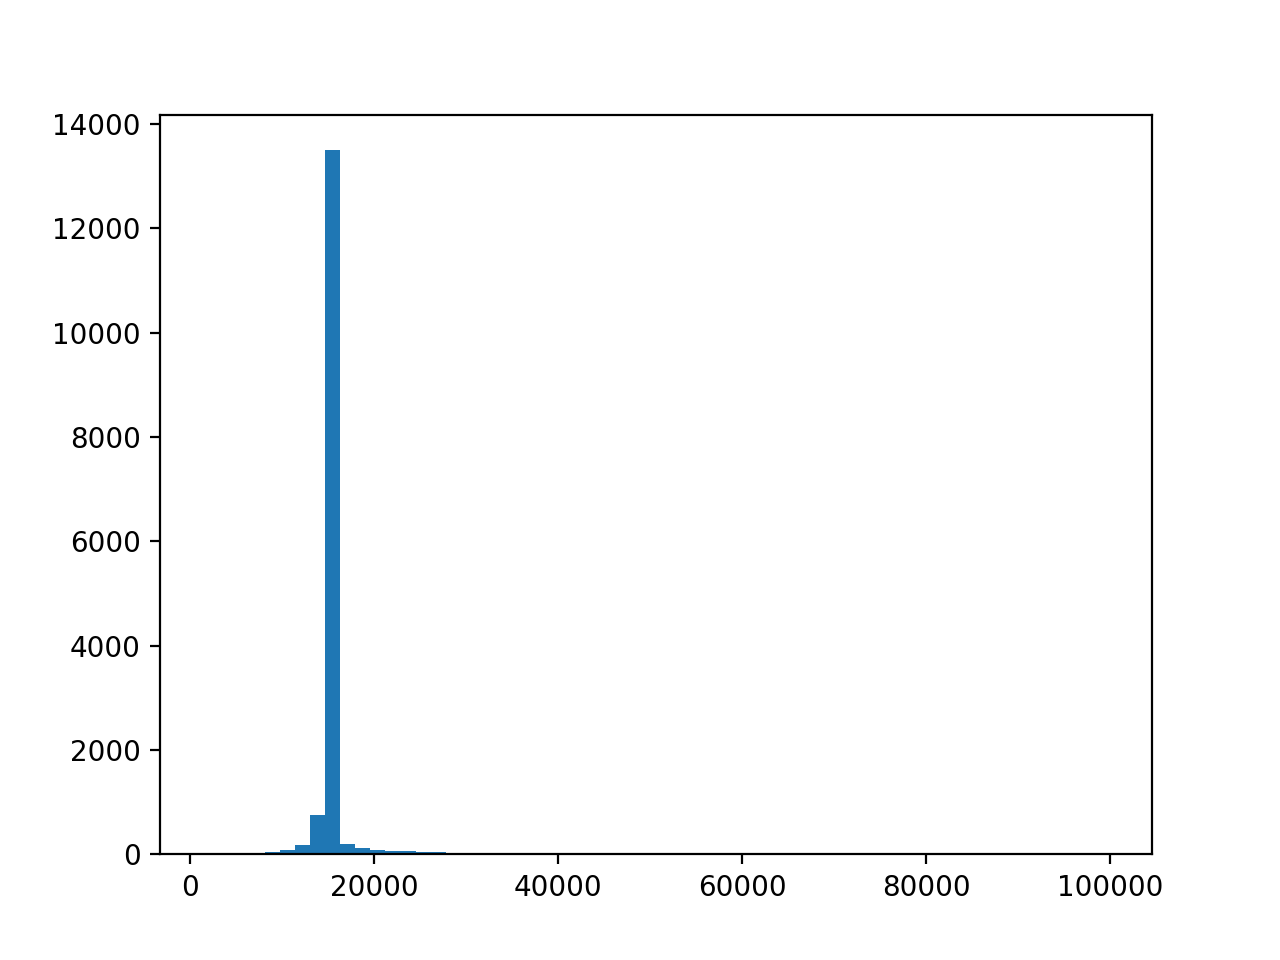

In [24]:
plt.figure()
plt.hist(good_taus,bins=60)
plt.show()

<IPython.core.display.Javascript object>


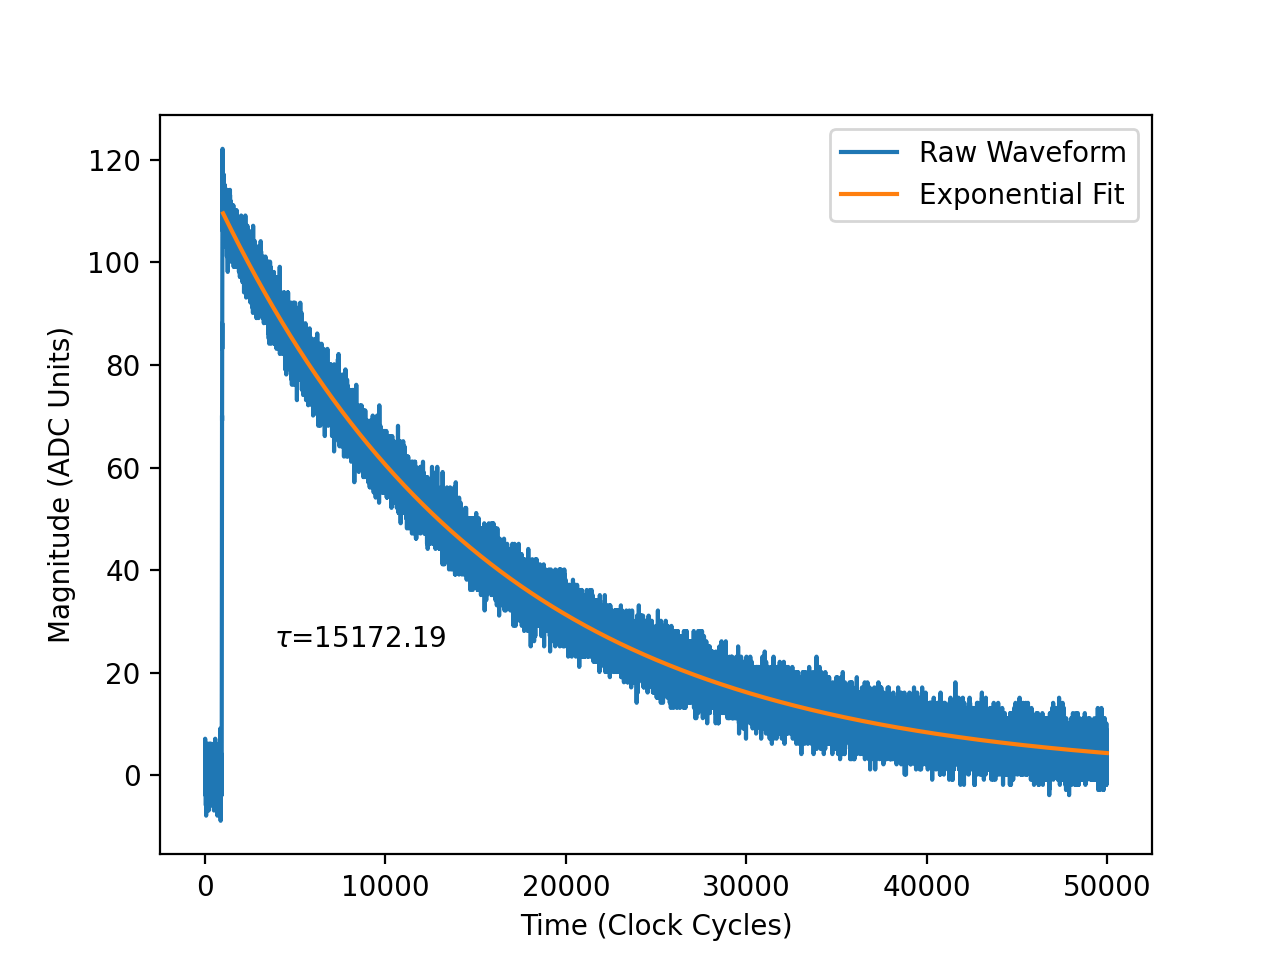

15172.188441483897

In [14]:
fit_tau(calibration_bkg[0],pre_sample_length=1000,fit_length=49000,show_plot=True)